<h1 align="center">Trabajo práctico integrador. <br> Análisis de datos.</h1>
<h4 align="center">Universidad de Buenos Aires.</h4>
<p align="right"> Por: Sevann Radhak Triztan. </p>

# 1. Introducción y motivación.

### 1.1. Dataset elegido.

Datos de distintas estaciones meteorológicas de Australia (weatherAus).
* Preguntas interesantes para considerar aquí: El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función datos meteorológicos del día actual.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('./weatherAUS.csv')
PLOT = False

# **2.** Análisis exploratorio inicial.

In [3]:
data.shape

(145460, 23)

### **2.1.** Visualizar las primeras filas.

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### **2.2.** Realizar un resumen de 5 números.

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### **2.3.** Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).

In [6]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### Definición de Variables Categóricas.

In [7]:
def categorical_columns(df):
    return df.select_dtypes(include=['object']).columns

def print_categorical_columns(data):
    categorical = categorical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in categorical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Categorical columns:')
    for col, null_count in sorted_columns:      
        unique_values = list(data[col].unique())
        if len(unique_values) > 20:
            unique_values = unique_values[:20] + ['...'] 
        print(f'{col.ljust(15)} {null_count} {str('null values.').ljust(15)} \t {data[col].nunique()} unique values: \t {unique_values}')

In [8]:
print_categorical_columns(data)

Categorical columns:
WindDir9am      10566 null values.    	 16 unique values: 	 ['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N', 'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE']
WindGustDir     10326 null values.    	 16 unique values: 	 ['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE', 'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW']
WindDir3pm      4228 null values.    	 16 unique values: 	 ['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW', 'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE']
RainTomorrow    3267 null values.    	 2 unique values: 	 ['No', 'Yes', nan]
RainToday       3261 null values.    	 2 unique values: 	 ['No', 'Yes', nan]
Date            0 null values.    	 3436 unique values: 	 ['01/12/2008', '02/12/2008', '03/12/2008', '04/12/2008', '05/12/2008', '06/12/2008', '07/12/2008', '08/12/2008', '09/12/2008', '10/12/2008', '11/12/2008', '12/12/2008', '13/12/2008', '14/12/2008', '15/12/2008', '16/12/2008', '17/12/2008', '18/12/2008', '19/12/2008', '20

- **WindDir9am, WindGustDir, WindDir3pm:**  
Variables categóricas nominales que representan la dirección del viento en diferentes momentos del día.  
- **RainTomorrow, RainToday:**  
Variables categóricas binarias que indican si llovió hoy o si lloverá mañana. Son muy informativas para el presente problema de clasificación.  
- **Date, Location:**  
Variables categóricas nominales que representan, respectivamente, la fecha y la ubicación de la observación. Son las unicas variables que contienen la totalidad de la información, por lo que serán fundamentales para el análisis e interpretación de los datos.


#### Definición de Variables Numéricas:

In [9]:
def numerical_columns(df):
    return df.select_dtypes(include=['float64', 'int64']).columns

def print_numerical_columns(data):
    numerical = numerical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in numerical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Numerical columns:')
    for col, null_count in sorted_columns:
        print(f'{col} \t {null_count} null values.')

In [10]:
print_numerical_columns(data)

Numerical columns:
Sunshine 	 69835 null values.
Evaporation 	 62790 null values.
Cloud3pm 	 59358 null values.
Cloud9am 	 55888 null values.
Pressure9am 	 15065 null values.
Pressure3pm 	 15028 null values.
WindGustSpeed 	 10263 null values.
Humidity3pm 	 4507 null values.
Temp3pm 	 3609 null values.
Rainfall 	 3261 null values.
WindSpeed3pm 	 3062 null values.
Humidity9am 	 2654 null values.
WindSpeed9am 	 1767 null values.
Temp9am 	 1767 null values.
MinTemp 	 1485 null values.
MaxTemp 	 1261 null values.


- **Sunshine, Evaporation:**   
Variables numéricas continuas que representan diferentes aspectos del clima.
- **Cloud3pm, Cloud9am:**  
Variables numéricas discretas que representan la fraccion de cielo cubierto por nubes (en octavos) en diferentes momentos del día.  
- **Pressure9am, Pressure3pm:**  
Variables numéricas continuas que representan la presión atmosférica en diferentes momentos del día.
- **WindGustSpeed, WindSpeed3pm, WindSpeed9am:**  
Variables numéricas continuas que representan la velocidad del viento en diferentes momentos del día
- **Humidity3pm, Humidity9am:**  
Variables numéricas continuas que representan la humedad (en porcentaje %) para  diferentes momentos del día.
- **Temp3pm, Temp9am, MinTemp, MaxTemp:**  
Variables numéricas continuas que representan la temperatura en diferentes momentos del día y las temperaturas mínima y máxima. **MinTemp y MaxTemp** son variables significativamente representativas que, al poseer menor cantidad de valores faltantes, son un excelente punto de partida para nuestro análisis e imputación de los datos faltantes.
- **Rainfall:**  
Variable numérica continua que representa la cantidad de lluvia. Es muy informativa para entender e interpretar el comportamiento de otras variables en nuestro análisis.

### **2.4.** Identificar las variables de entrada y de salida del problema.

In [11]:
def input_and_target_variables(data, target):
    input_variables = data.drop(target, axis=1)
    target_variable = data[target]
    variable_names = input_variables.columns.tolist()
    return variable_names, target_variable

In [12]:
variable_names, target_variable = input_and_target_variables(data, 'RainTomorrow')

print(f"Input variables: {variable_names}")
print(f'Target variable: {target_variable.name}')

Input variables: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
Target variable: RainTomorrow


### **2.5.** Variables de entrada:
Realizar los siguientes análisis por tipo de variable.

In [13]:
import scipy.stats as stats

def plot_histogram(df, column, ax):
    plot = sns.histplot(df[column], bins=40, ax=ax, kde=True, color='blue') 
    plot.get_lines()[0].set_color('red')  
    ax.set_xlabel(column, fontsize=18)
    ax.set_ylabel('Frequency', fontsize=18)

def print_statistics(df, column, ax=None):
    stats_text = f"""
    Mean: {df[column].mean():.2f}
    Median: {df[column].median():.2f}
    Mode: {df[column].mode()[0]:.2f}
    Std Dev: {df[column].std():.2f}
    Variance: {df[column].var():.2f}
    Skewness: {df[column].skew():.2f}
    Kurtosis: {df[column].kurt():.2f}
    """
    if ax is not None:
        ax.axis('off')
        ax.text(0.2, 0.5, stats_text, horizontalalignment='left', verticalalignment='center', fontsize=20)
    else:
        print(stats_text)

def draw_plots(df, column, axs):
    # Boxplot
    axs[1, 0].boxplot(df[column].dropna())
    axs[1, 0].set_title(f'Boxplot of {column}')

    # QQ-Plot
    stats.probplot(df[column].dropna(), dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title(f'QQ-Plot of {column}')

def plot_histogram_and_statistics(df, columns, PLOT=False):
    for column in columns:
        print(f'Column: {column}')
        if PLOT:
            fig, axs = plt.subplots(2, 2, figsize=(15, 10))
            plot_histogram(df, column, axs[0, 0])
            print_statistics(df, column, axs[0, 1])
            draw_plots(df, column, axs)
            plt.tight_layout()
            plt.show()
        else:
            print_statistics(df, column)

#### **2.5.1. Numéricas:** Obtener conclusiones acerca de la distribución de los datos.

In [14]:
plot_histogram_and_statistics(data, data[numerical_columns(data)].columns, PLOT)

Column: MinTemp

    Mean: 12.19
    Median: 12.00
    Mode: 11.00
    Std Dev: 6.40
    Variance: 40.94
    Skewness: 0.02
    Kurtosis: -0.48
    
Column: MaxTemp

    Mean: 23.22
    Median: 22.60
    Mode: 20.00
    Std Dev: 7.12
    Variance: 50.68
    Skewness: 0.22
    Kurtosis: -0.22
    
Column: Rainfall

    Mean: 2.36
    Median: 0.00
    Mode: 0.00
    Std Dev: 8.48
    Variance: 71.88
    Skewness: 9.84
    Kurtosis: 178.15
    
Column: Evaporation

    Mean: 5.47
    Median: 4.80
    Mode: 4.00
    Std Dev: 4.19
    Variance: 17.59
    Skewness: 3.76
    Kurtosis: 45.04
    
Column: Sunshine

    Mean: 7.61
    Median: 8.40
    Mode: 0.00
    Std Dev: 3.79
    Variance: 14.33
    Skewness: -0.50
    Kurtosis: -0.83
    
Column: WindGustSpeed

    Mean: 40.04
    Median: 39.00
    Mode: 35.00
    Std Dev: 13.61
    Variance: 185.15
    Skewness: 0.87
    Kurtosis: 1.42
    
Column: WindSpeed9am

    Mean: 14.04
    Median: 13.00
    Mode: 9.00
    Std Dev: 8.92
    Varianc

**Observaciones:**

**MinTemp y MaxTemp:** Ambas columnas tienen una media y mediana muy cercanas, lo que sugiere una distribución casi simétrica. La curtosis negativa indica que la distribución es platikúrtica.

**Rainfall:** La media es mucho mayor que la mediana, lo que indica una distribución sesgada a la derecha. La alta curtosis y oblicuidad sugieren la presencia de valores atípicos extremos. Su curtosis mayor que 3 indica que la distribución es leptokúrtica.

**Evaporation:** Similar a Rainfall, tiene una distribución sesgada a la derecha con valores atípicos extremos. Su curtosis mayor que 3 indica que la distribución es leptokúrtica.

**Sunshine:** La distribución muestra una ligera asimetría hacia la izquierda y exhibe características platikúrticas, indicando una menor frecuencia de valores extremos en comparación con una distribución normal. Un detalle notable en la gráfica es la abundancia de valores cero (0). Esta acumulación sugiere la posible presencia de errores o datos faltantes que han sido codificados como cero, lo cual requerirá una atención y tratamiento adecuados en etapas posteriores del análisis.

**WindGustSpeed, WindSpeed9am, WindSpeed3pm:** Estas columnas tienen una distribución ligeramente sesgada a la derecha, lo que indica que hay más días con velocidades de viento más bajas. Las tres distribuciones son mesokúrticas. 

**Humidity9am, Humidity3pm:** Ambas columnas tienen una distribución casi simétrica con una ligera oblicuidad negativa para Humidity9am y positiva para Humidity3pm. La distribuciones son platikúrticas.

**Pressure9am, Pressure3pm:** Ambas columnas tienen una distribución casi simétrica con una ligera oblicuidad negativa. Ambas distribuciones son mesokúrticas. 

**Cloud9am, Cloud3pm:** Ambas columnas tienen una distribución ligeramente sesgada a la izquierda y son platikúrticas.

**Temp9am, Temp3pm:** Ambas columnas tienen una distribución casi simétrica con una ligera oblicuidad positiva. Ambas distribuciones son platikúrticas.

En general, las columnas **Rainfall, Evaporation y Sunshine** parecen tener los valores más atípicos, lo que podría ser un área de interés para una investigación más profunda. Además, la mayoría de las columnas parecen tener una distribución aproximadamente simétrica, lo que es una buena señal para muchos modelos estadísticos.

In [15]:
data[numerical_columns(data).values].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Basándonos en el resumen estadístico, las columnas que podrían contener valores atípicos son aquellas donde la diferencia entre el valor máximo y el percentil 75, o el valor mínimo y el percentil 25, es significativamente grande.

- Rainfall: El valor máximo es 371, mientras que el percentil 75 es 0.8.
- Evaporation: El valor máximo es 145, mientras que el percentil 75 es 7.4.
- WindGustSpeed: El valor máximo es 135, mientras que el percentil 75 es 48.
- WindSpeed9am: El valor máximo es 130, mientras que el percentil 75 es 19.

#### **2.5.2.** Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc. 

Análisis de variables que puedan tener alta cardinalidad.

In [16]:
max_length = max(len(var) for var in data[categorical_columns(data).values])

for var in data[categorical_columns(data).values]:    
    print(f'{var.ljust(max_length)} \t{len(data[var].unique())} labels.')

Date         	3436 labels.
Location     	49 labels.
WindGustDir  	17 labels.
WindDir9am   	17 labels.
WindDir3pm   	17 labels.
RainToday    	3 labels.
RainTomorrow 	3 labels.


#### **2.5.2.1.** Date:  
Esta variable tiene una cardinalidad muy alta con 3436 etiquetas únicas. Si se utiliza como característica en un modelo de aprendizaje automático, podría ser más útil extraer componentes como el año, el mes y el día, en lugar de usar la fecha completa.

#### **2.5.2.2.** Location:
Esta variable tiene una cardinalidad moderada con 49 etiquetas únicas. Esta variable será usada como variable de agrupación para analizar y estimar los datos faltantes.

#### **2.5.2.3.** WindGustDir, WindDir9am, WindDir3pm:
Estas variables tienen todas 17 etiquetas únicas.

#### **2.5.2.4.** RainToday, RainTomorrow:
Estas variables son de tipo boolean.

### **2.6.** Variables de salida (en caso de aplicar):

#### **2.6.1.** ¿Están balanceadas las clases?

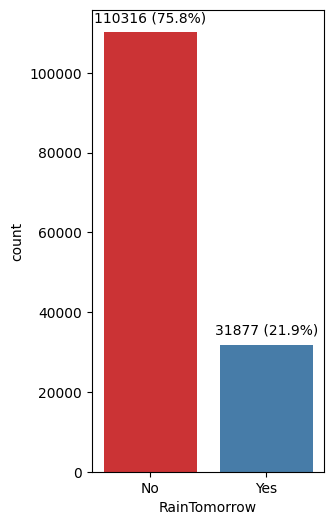

In [17]:
f, ax = plt.subplots(figsize=(3, 6))
ax = sns.countplot(x="RainTomorrow", hue="RainTomorrow", data=data, palette="Set1", legend=False)

total = len(data)
for p in ax.patches:
    count = format(p.get_height(), '.0f')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count} ({percentage})', (x, y), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

El desbalanceo no es lo sufiencienteme grande para considerarse significativo.

#### **2.6.2.** ¿Qué técnicas consideraría para codificar la variable de salida (en caso de aplicar)? Justifique.

La variable de salida 'RainTomorrow' es una variable categórica binaria, lo que significa que tiene dos categorías: 'Yes' y 'No'. En este caso, se codificará la variable de salida en un número entero usando codificación binaria o de etiquetas (Label Encoding).

Esta elección está justificada ya que los algoritmos de aprendizaje automático suelen requerir que la variable de salida sea un solo vector de números enteros para la clasificación binaria.

# **3.** Limpieza y preparación de datos / ingeniería de features.

### **3.1.** Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.

In [18]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = (df.isnull().sum().sort_values(ascending = False)/len(df)*100)[df.isnull().sum().sort_values(ascending = False) != 0]
    return pd.concat([total, round(percent,2)], axis=1, keys=['Total', 'Percent (%)'])

In [19]:
missing_percentage(data)

,Total,Percent (%)
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


### **3.2.** ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría? Ensayar distintas técnicas y analizar los resultados.

Los datos faltantes pueden surgir por diversas razones, incluyendo errores en la recopilación o falta de disponibilidad de información. 

**Supuestos:** En este caso, variables como 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am' tienen más del 30% de datos faltantes, lo que podría indicar que no se recogieron en todas las ubicaciones o momentos. Para variables con menos del 5% de datos faltantes, como 'Humidity9am', 'Temp9am', 'WindSpeed9am', 'MinTemp', 'MaxTemp', se podría asumir que los datos faltantes son aleatorios.

Matriz de datos faltantes:

In [20]:
import missingno as msno

if PLOT:
    msno.matrix(data)

#### **3.2.1** Limpieza de datos que proporcionan muy poca información.

In [21]:
def process_nan_records(data, exclude_columns):
    # Select all columns except those specified in 'exclude_columns'
    columns = [col for col in data.columns if col not in exclude_columns]

    # Find the records where all selected columns are NaN
    nan_indices = data[data[columns].isnull().all(axis=1)].index

    # Return the DataFrame with the records of the specified indices
    nan_records = data.loc[nan_indices]

    # Create a new DataFrame that excludes the NaN records
    data_without_nan = data.drop(nan_indices)

    return nan_indices, nan_records, data_without_nan

In [22]:
nan_indices, nan_records, data = process_nan_records(data, ['Location', 'Date'])

In [23]:
nan_records

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
984,11/09/2011,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,12/09/2011,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2032,22/09/2014,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3525,01/05/2010,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3526,02/05/2010,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127747,07/08/2011,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127748,08/08/2011,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127749,09/08/2011,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136063,18/06/2017,Launceston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


#### **3.2.2** Mapa de correlacion

In [25]:
def plot_heatmap(correlation_matrix, title='Correlation Heatmap', fig_size=(16, 12), cmap='coolwarm', linecolor='white', linewidths=0.5):
    fig, ax = plt.subplots(figsize=fig_size)
    sns.heatmap(correlation_matrix, ax=ax, square=True, annot=True, fmt='.2f', linecolor=linecolor, linewidths=linewidths, cmap=cmap)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
    fig.patch.set_facecolor('silver')
    plt.show()

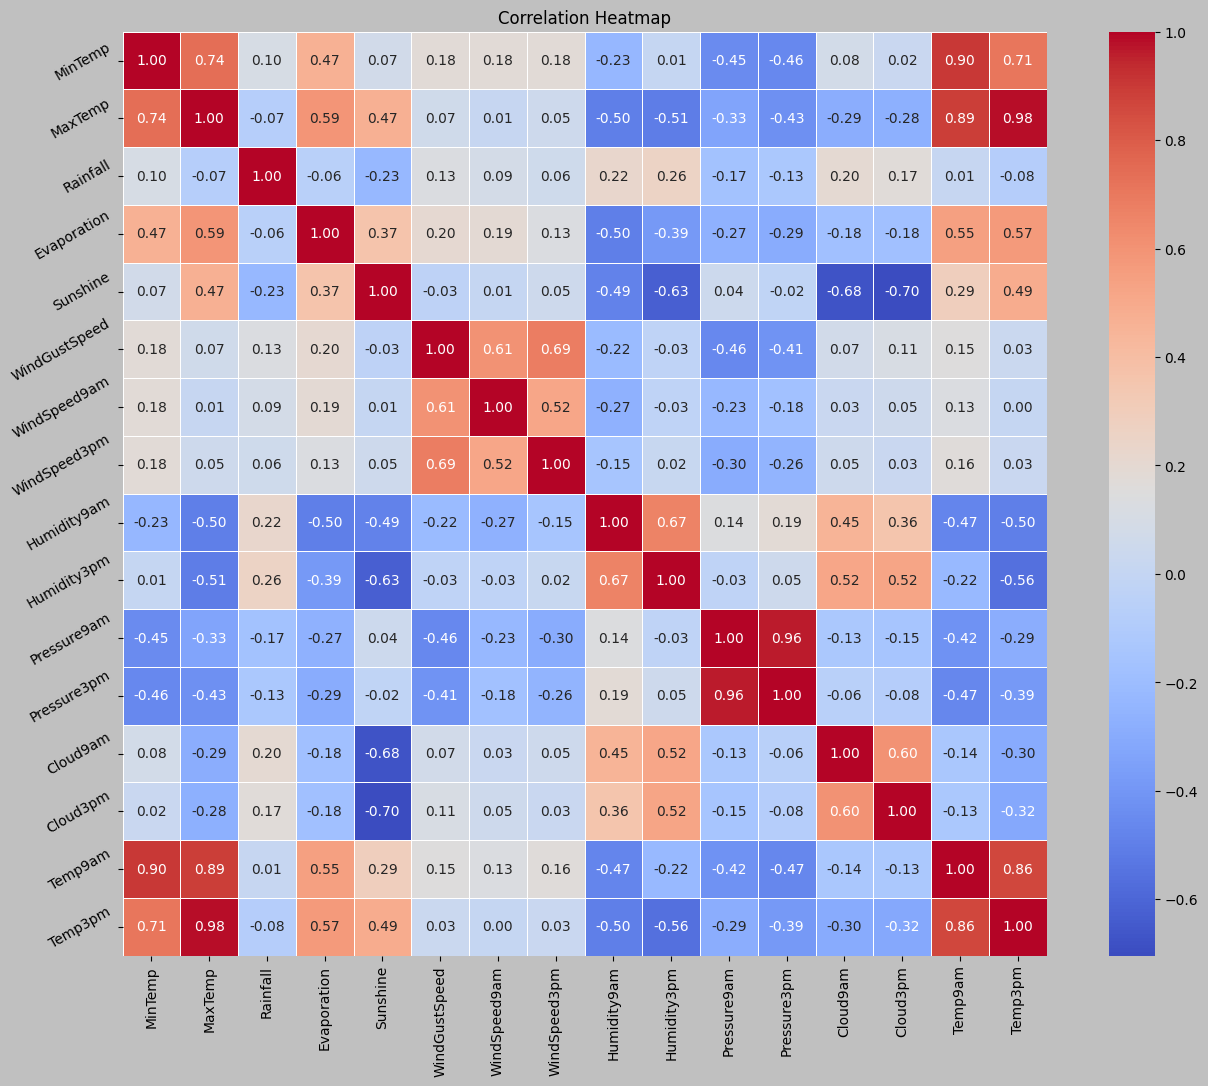

In [26]:
correlation = data[numerical_columns(data).values].corr()
plot_heatmap(correlation)

**Observaciones:**  
Las variables con la correlación más fuerte positiva son 'MaxTemp' y 'Temp3pm' con una correlación de 0.98. Esto indica que a medida que la temperatura máxima del día aumenta, la temperatura a las 3pm también tiende a aumentar. Las variables 'MinTemp' y 'Temp9am' también tienen una fuerte correlación positiva de 0.90, lo que indica que las temperaturas mínimas y las temperaturas a las 9am están estrechamente relacionadas.

La presión a las 9am ('Pressure9am') y a las 3pm ('Pressure3pm') tienen una fuerte correlación positiva de 0.96, lo que indica que la presión tiende a ser similar en estos dos momentos del día.

Las variables con la correlación más fuerte negativa son 'Sunshine' y 'Cloud3pm' con una correlación de -0.70. Esto indica que a medida que la cantidad de sol durante el día aumenta, la cantidad de nubes a las 3pm tiende a disminuir.

La humedad a las 9am ('Humidity9am') y a las 3pm ('Humidity3pm') tienen una correlación positiva de 0.67, lo que indica que la humedad tiende a ser similar en estos dos momentos del día.

#### Datos inconsistentes.

In [27]:
def get_inconsistent_data(data, conditions):
    return pd.concat([data[condition] for condition in conditions])

#### **3.2.3** MinTemp, MaxTemp, Temp9am, Temp3pm: Inconsistencias en las temperaturas (ej: Temp3pm mayor que MaxTemp).

In [28]:
def get_temp_conditions(data):
    temp_conditions = [
        data['MinTemp'] > data['Temp9am'],
        data['MinTemp'] > data['Temp3pm'],
        data['MaxTemp'] < data['Temp9am'],
        data['MaxTemp'] < data['Temp3pm']
    ]
    return temp_conditions

In [29]:
columns_to_display = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

temp_conditions = get_temp_conditions(data)
get_inconsistent_data(data, temp_conditions)[columns_to_display]

,MinTemp,MaxTemp,Temp9am,Temp3pm
34277,22.8,24.6,22.7,23.4
46697,19.5,21.0,17.3,20.0
109333,19.3,22.0,19.2,20.9
110502,12.5,15.4,12.0,13.0
128396,15.2,17.7,15.1,16.7
...,...,...,...,...
142335,NaN,30.4,NaN,30.5
142719,20.9,34.9,25.5,35.0
142944,25.3,36.9,30.2,37.0
143072,23.8,32.9,27.2,33.0


In [30]:
def correct_temperatures(data, temp_columns, min_max_columns):
    for temp_column in temp_columns:
        for min_max_column in min_max_columns:
            data[temp_column] = data[[temp_column, min_max_column]].max(axis=1)
            data[temp_column] = data[[temp_column, min_max_column]].min(axis=1)
    
    return data

In [31]:
correct_temperatures(data, ['Temp9am', 'Temp3pm'], ['MinTemp', 'MaxTemp'])
get_inconsistent_data(data, temp_conditions)[columns_to_display]

,MinTemp,MaxTemp,Temp9am,Temp3pm
34277,22.8,24.6,24.6,24.6
46697,19.5,21.0,21.0,21.0
109333,19.3,22.0,22.0,22.0
110502,12.5,15.4,15.4,15.4
128396,15.2,17.7,17.7,17.7
...,...,...,...,...
142335,NaN,30.4,30.4,30.4
142719,20.9,34.9,34.9,34.9
142944,25.3,36.9,36.9,36.9
143072,23.8,32.9,32.9,32.9


#### **3.2.4** Sunshine: Posibles errores de Imputación (gran abundancia de valores cero).

In [32]:
data['Sunshine'].value_counts()

Sunshine
0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: count, Length: 145, dtype: int64

**Explorar tendencia:** Dado que existe una correlación de -0.70 entre 'Sunshine' y 'Cloud3pm', podría ser útil analizar si hay una tendencia de que 'Sunshine' valga cero en relación con 'Cloud3pm'.

In [33]:
def check_sunshine_cloud_relation(data):
    # Check if 'Sunshine' tends to be 0 when 'Cloud3pm' is high
    high_cloud3pm = data['Cloud3pm'] > data['Cloud3pm'].median()
    sunshine_zero = data['Sunshine'] == 0

    return round((high_cloud3pm & sunshine_zero).mean(), 4)

In [34]:
check_sunshine_cloud_relation(data)

0.0141

Dado que la proporción de días en los que 'Cloud3pm' es mayor que su mediana y 'Sunshine' es 1.4%, no se evidencia una tendencia clara de que 'Sunshine' sea 0 cuando 'Cloud3pm' es alto.

Por tal motivo, vamos a considerar estos valores ('Sunshine' = 0) como errores de medición o de registro y serán estimados en la etapa de imputación de datos. 

In [35]:
data['Sunshine'] = data['Sunshine'].replace(0, np.nan)

**Observacion:**  
Podríamos pensar en eliminar esta columna, ya que presenta un significativo numero de valores bajos para 'Sunshine'. Por conocimiento externo, Melbourne es la ciudad con posible menor cantidad de 'Sunshine' (estimado en 120 en un mes, 4 por día en promedio). Si consideramos los valores por debajo de esta medida como errores de medición, esta columna nos aportaria significativa muy poca información.

#### **3.2.5.** 'Rainfall', 'Evaporation': Exploracion y analisis de valores con curtosis > 3.

In [36]:
def find_max_correlation(correlation, column):
    """Find the variable that has the strongest correlation with the given column."""
    return correlation[column].sort_values(ascending=False).index[1]

In [37]:
def get_top_records_and_group(data, sort_col, select_cols, n):
    # Get the 'n' records with the largest value in 'sort_col'
    top_records = data.nlargest(n, sort_col)[select_cols]

    # Get the unique locations of the top records
    unique_locations = top_records['Location'].unique()

    # For each location, get the 'n' top records and add them to a list
    top_records_per_location = []
    for location in unique_locations:
        top_n_for_location = data[data['Location'] == location].nlargest(n, sort_col)[select_cols]
        top_records_per_location.append(top_n_for_location)

    # Concatenate all the DataFrames in the list into a single DataFrame
    result = pd.concat(top_records_per_location)

    return result

In [38]:
size = 10
columns_to_check = ['Rainfall', 'Evaporation']

In [39]:
for column in columns_to_check:
    max_corr = find_max_correlation(correlation, column)
    print(f"The strongest correlation with '{column}' is with '{max_corr}'.")

The strongest correlation with 'Rainfall' is with 'Humidity3pm'.
The strongest correlation with 'Evaporation' is with 'MaxTemp'.


'Rainfall':

In [40]:
column = 'Rainfall'
columns_to_display = ['Location', 'Rainfall', 'Humidity3pm', 'RainToday', 'RainTomorrow']

get_top_records_and_group(data, column, columns_to_display, size)

,Location,Rainfall,Humidity3pm,RainToday,RainTomorrow
9368,CoffsHarbour,371.0,81.0,Yes,Yes
11681,CoffsHarbour,219.6,83.0,Yes,No
10485,CoffsHarbour,208.5,96.0,Yes,Yes
9105,CoffsHarbour,189.0,64.0,Yes,Yes
10486,CoffsHarbour,172.2,77.0,Yes,No
10445,CoffsHarbour,159.8,72.0,Yes,No
11232,CoffsHarbour,157.8,60.0,Yes,No
10154,CoffsHarbour,153.2,83.0,Yes,Yes
10574,CoffsHarbour,147.8,50.0,Yes,No
11965,CoffsHarbour,142.8,79.0,Yes,No


En este caso, estamos viendo datos de lluvia, que pueden ser altamente variables y pueden tener eventos extremos (como tormentas fuertes o huracanes) que producen valores de lluvia muy altos. Además, la correlación fuerte entre 'Rainfall' y 'RainToday' sugiere que estos valores altos no son simplemente errores aleatorios, sino que están asociados con días de lluvia.

Además, si observamos los datos agrupados por ciudad, vemos que las ciudades con los valores más altos de 'Rainfall' también tienden a tener valores altos. Esto sugiere que estos valores altos pueden ser característicos de estas ubicaciones.

Por lo tanto, en base a la información proporcionada, parece más probable que estos valores atípicos sean propios de la naturaleza de los datos y no errores.

'Evaporation':

In [41]:
column = 'Evaporation'
columns_to_display = ['Location', 'Evaporation', 'MaxTemp', 'RainToday', 'RainTomorrow']

get_top_records_and_group(data, column, columns_to_display, size)

,Location,Evaporation,MaxTemp,RainToday,RainTomorrow
42358,Williamtown,145.0,23.9,Yes,No
41294,Williamtown,64.4,28.5,No,No
42316,Williamtown,59.2,33.0,No,No
42288,Williamtown,55.4,33.4,No,Yes
42370,Williamtown,47.0,32.2,No,No
41181,Williamtown,43.6,22.3,No,No
41203,Williamtown,40.0,35.4,No,No
41287,Williamtown,38.8,26.0,No,No
40856,Williamtown,38.0,25.0,No,No
40913,Williamtown,38.0,32.0,No,No


Nuevamente considero que los valores atipicos puedan corresponderse con eventos propios de su  naturaleza.

### **3.3.** En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable.

In [49]:
from sklearn.preprocessing import LabelEncoder

def encode_variables(data, columns):
    le = LabelEncoder()

    for column in columns:
        # Fit the encoder on the non-null data
        non_null_data = data[column].dropna()
        le.fit(non_null_data)

        # Transform non-null data
        data.loc[data[column].notnull(), column] = le.transform(data.loc[data[column].notnull(), column])

    return data

In [50]:
data2 = data.copy()

In [51]:
data2 = encode_variables(data2, ['RainToday', 'RainTomorrow'])

In [52]:
data2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,22.9,22.9,0,0
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,25.1,25.1,0,0
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,25.7,25.7,0,0
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,28.0,28.0,0,0
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,32.3,32.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,23.4,23.4,0,0
145456,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,25.3,25.3,0,0
145457,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,26.9,26.9,0,0
145458,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,27.0,27.0,0,0


In [54]:
data2['RainToday'].value_counts()

RainToday
0    110319
1     31880
Name: count, dtype: int64

3. Limpieza y preparación de datos / ingeniería de features
Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría? Ensayar distintas técnicas y analizar los resultados.
En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de
datos compuestos o estructurados, considerar la obtención de variables de tipo numérico/categórico.
¿Qué puede decir acerca de las relaciones entre las variables de entrada?
Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia? Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.


